In [3]:
#%ls
#!ls

# Digits Example

## Exploratory Analysis

In [39]:
from sklearn.datasets import load_digits
import numpy as np
digits = load_digits()
digits.keys()
import pandas as pd
import seaborn as sns

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
from ggplot import *

/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [456]:
from sklearn.metrics import mean_squared_error, r2_score, f1_score

In [9]:
print digits.data.shape
print type(digits.data)
print digits.target

(1797, 64)
<type 'numpy.ndarray'>
[0 1 2 ..., 8 9 8]


In [28]:
#equivalent as
pd.DataFrame({'target':digits.target})['target'].value_counts().sort_index()

#to access Series keys, use keys() or .index

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

In [16]:
np.bincount(digits.target) #count as non_negative counts

array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180])

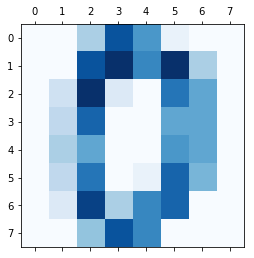

In [30]:
plt.matshow(digits.data[0].reshape(8,8), cmap=plt.cm.Blues)

In [33]:
digits.data[0] #one dimensional array

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

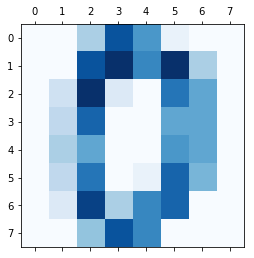

In [38]:
plt.matshow(digits.data[0].reshape(8,8), cmap=plt.cm.Blues) #heatmap type of data

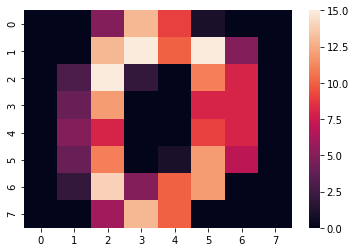

In [40]:
sns.heatmap(digits.data[0].reshape(8,8)) #easier to plot this way

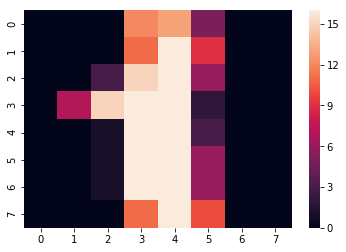

In [41]:
sns.heatmap(digits.data[1].reshape(8,8))

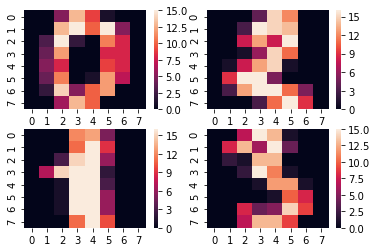

In [51]:
#this is how to make multiple plots in one
fig, axs = plt.subplots(ncols=2, nrows=2)
sns.heatmap(digits.data[0].reshape(8,8), ax=axs[0][0])
sns.heatmap(digits.data[1].reshape(8,8), ax=axs[1][0])
sns.heatmap(digits.data[2].reshape(8,8), ax=axs[0][1])
sns.heatmap(digits.data[3].reshape(8,8), ax=axs[1][1])

#This doesn't work
#plt.matshow(digits.data[0].reshape(8,8), cmap=plt.cm.Blues, ax=axs[2][0])

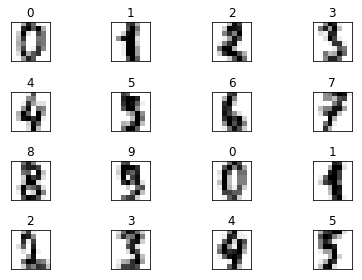

In [55]:
# inorder to run multiple with matshow, here's how it works
fig, axes = plt.subplots(4, 4)
for x, y, ax in zip(digits.data, digits.target, axes.ravel()): #ravel basically means to flatten 2D array into 1D array
    ax.set_title(y)
    ax.imshow(x.reshape(8, 8), cmap="gray_r") #can replace with matshow
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()

## Simple Model Split

In [579]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                    train_size = 0.8
                                                   )
#?train_test_split

In [66]:
print X_train.shape
print X_test.shape
#default 3:1

(1437, 64)
(360, 64)


# Modeling
## SVM
### Model

In [70]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [71]:
svm.score(X_train, y_train)

0.99652052887961029

In [72]:
svm.score(X_test, y_test)

0.94999999999999996

### Evaluation Metrics

In [84]:
from sklearn.metrics import average_precision_score #only binary
from sklearn.metrics import f1_score #multi-class
from sklearn.metrics import roc_auc_score #only binary

In [86]:
#average_precision_score(y_train, svm.predict(X_train), average='micro')
#not bad. Accuracy is bad for imbalanced classes
print f1_score(y_train, svm.predict(X_train), average='micro')
print f1_score(y_test,  svm.predict(X_test), average='micro')

0.99652052888
0.95


### Classification Report / Evaluation Metrics

In [580]:
from sklearn.metrics import classification_report
print classification_report(y_test, svm.predict(X_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        35
          1       0.97      0.97      0.97        37
          2       1.00      1.00      1.00        38
          3       1.00      0.97      0.99        35
          4       1.00      1.00      1.00        41
          5       1.00      0.98      0.99        41
          6       0.98      1.00      0.99        43
          7       1.00      1.00      1.00        31
          8       0.93      0.96      0.94        26
          9       1.00      1.00      1.00        33

avg / total       0.99      0.99      0.99       360



In [582]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, svm.predict(X_test))) #Yes this can be more than 1 class

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 40  1  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 31  0  0]
 [ 0  1  0  0  0  0  0  0 25  0]
 [ 0  0  0  0  0  0  0  0  0 33]]


In [588]:
from sklearn.metrics import adjusted_rand_score
print adjusted_rand_score([1,1,0,0],[1,0,0,1]) #-0.5
print adjusted_rand_score([1,1,0,0],[1,1,0,0]) # 1.0

-0.5
1.0


In [592]:
#not that useful, measures whetehr a cluster only contains homogenious members 
from sklearn.metrics import homogeneity_score
print homogeneity_score([1,1,0,0,0],[1,0,0,1,0])

0.0205706594507


In [595]:
#meaure agreement of two clusterings
from sklearn.metrics import v_measure_score
print v_measure_score([1,1,0,0],[1,0,0,1])

0.0


## Random Forest
### Model

In [88]:
from sklearn.ensemble import RandomForestClassifier
#roc_auc_score(y_train, svm.predict(X_train), average='micro') #only sup

In [89]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
print rf.score(X_train, y_train)
print rf.score(X_test, y_test) #default as accuracy

1.0
0.983333333333


In [101]:
# F1 = 2 * precision * recall / (precision + recall)
print f1_score(y_train, rf.predict(X_train), average='weighted')
print f1_score(y_test,  rf.predict(X_test), average='weighted')

1.0
0.983105219883


In [97]:
?rf.score

# Cross Validation
## Simple K-fold Cross-validation

[Scoring options](http://scikit-learn.org/0.15/modules/model_evaluation.html)

- accuracy
- average_precision
- f1
- precison
- recall
- roc_auc
- mean_absolute_error
- mean_squared_error
- r2 
- adjusted_rand_score (used for clustering)

In [212]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [213]:
?cross_val_score

In [222]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train, cv=5).mean() #can't pass f1 here; needs some more work

0.98610218741177502

## Create KFold Explicity

In [238]:
from sklearn.model_selection import KFold, StratifiedKFold

In [239]:
kf = KFold(n_splits=5, shuffle=True) #Shuffle data before cutting

In [241]:
cross_val_score(knn, X_train, y_train, cv=kf).mean()

0.98399632210607813

## Multi-label Encoder

In [223]:
from sklearn.preprocessing import LabelBinarizer

In [229]:
lb = LabelBinarizer()
y_train_ova = lb.fit_transform(y_train) #one versus all

In [230]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_ova)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [237]:
#knn.score(knn.predict(X_train), y_train_ova)
y_train_ova
lb.inverse_transform(knn.predict(X_train)) #can bring it back to original labels

array([4, 5, 7, ..., 0, 0, 5])

# Scaling

## z-transformation

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [104]:
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [108]:
standard_scaler.fit(X_train) #use fit_transform to do one step change 
X_train_ss = standard_scaler.transform(X_train)

robust_scaler.fit(X_train)
X_train_rs = robust_scaler.transform(X_train)

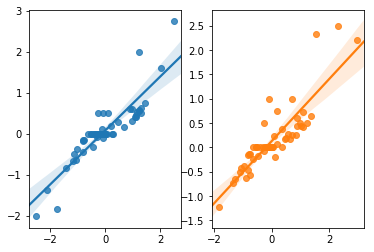

In [120]:
fig, axs = plt.subplots(ncols=2)
#kde plot will plot density; jointplot doesn't work for multiplots
sns.regplot(X_train_ss[0,:], X_train_rs[0,:], ax=axs[0])
sns.regplot(X_train_ss[1,:], X_train_rs[1,:], ax=axs[1])

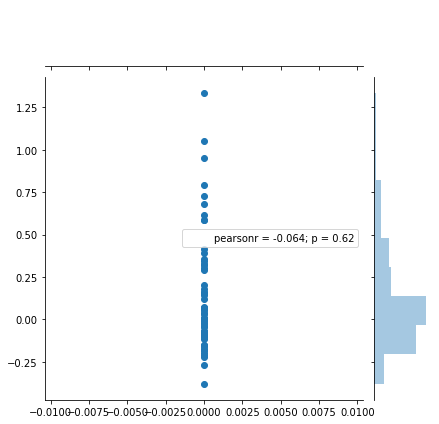

In [126]:
sns.jointplot(X_train_ss.mean(axis=0),X_train_rs.mean(axis=0)) #all 0
#sns.pairplot

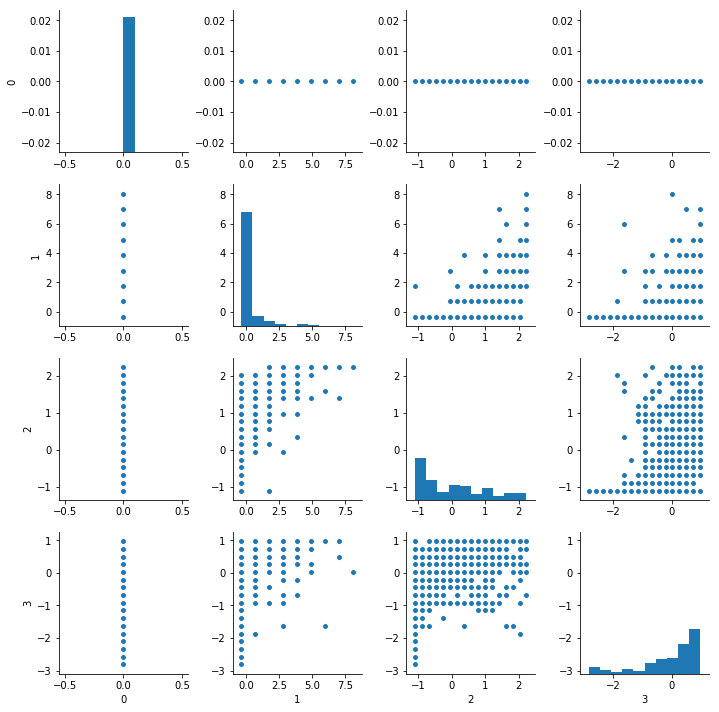

In [133]:
#http://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(pd.DataFrame(X_train_ss[:,0:4])) #pairwise view of features, good way to investigate interactions

In [140]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_ss, y_train)
rf.score(X_train_ss, y_train) #almost perfect

1.0

In [139]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_test)
X_test_rs = robust_scaler.transform(X_test)

In [143]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_rs, y_train)
rf.score(X_test_rs, y_test) #the scaling of test data is independent of training data; however this requires sufficient test data to scale

0.98611111111111116

# Dimension Reduction

## PCA

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

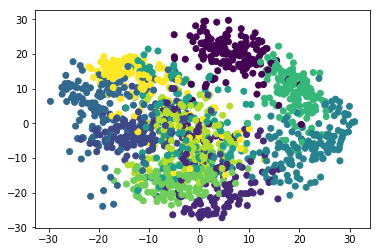

In [149]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)

In [175]:
xt_pca = pd.DataFrame(X_train_pca)
xt_pca.columns = ['c1','c2']
xt_pca['class'] = y_train #use y_train.astype to convert
xt_pca['class'] = xt_pca['class'].astype(object)

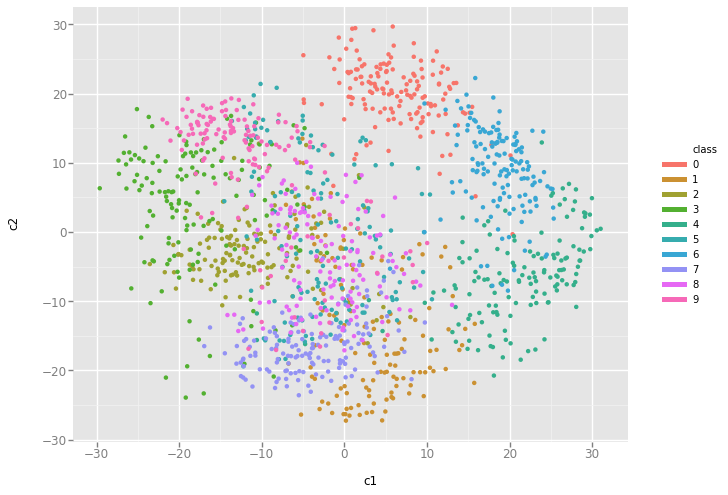

<ggplot: (7005798437)>

In [174]:
ggplot(aes(x='c1',y='c2', color='class'), data=xt_pca) + geom_point()

In [190]:
pca = PCA(n_components=3)
pca.fit(X_train)
xt_pca3 = pca.transform(X_train)

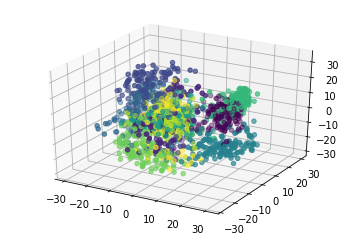

In [193]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xt_pca3[:,0], ys=xt_pca3[:,1], zs=xt_pca3[:,2], c=y_train)

## NMF

In [176]:
from sklearn.decomposition import NMF

In [177]:
nmf = NMF(n_components=2)

In [178]:
nmf.fit(X_train)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=2, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [179]:
xt_nmf = nmf.transform(X_train)

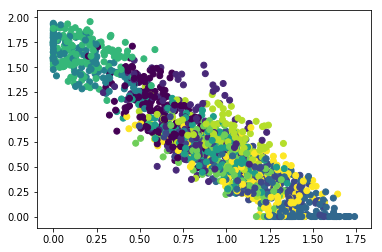

In [182]:
plt.scatter(xt_nmf[:,0], xt_nmf[:,1], c=y_train)

In [184]:
from mpl_toolkits.mplot3d import Axes3D #plot 3D

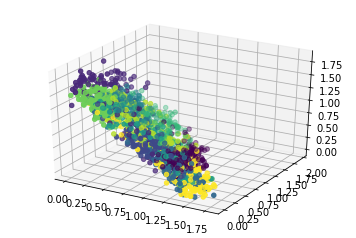

In [188]:
nmf = NMF(n_components=3)
nmf.fit(X_train)
xt_nmf3 = nmf.transform(X_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xt_nmf3[:,0], ys=xt_nmf3[:,1], zs=xt_nmf3[:,2], c=y_train)

## ISOMAP

In [194]:
from sklearn.manifold import Isomap
isomap = Isomap()
xt_isomap = isomap.fit_transform(X_train)

In [195]:
xt_isomap.shape

(1437, 2)

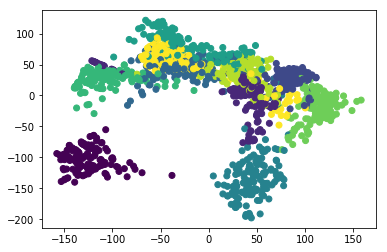

In [198]:
plt.scatter(xt_isomap[:,0], xt_isomap[:,1], c=y_train) #decent separation

In [199]:
#We would like to check 3d

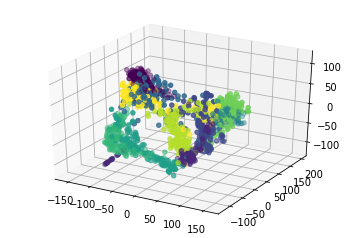

In [201]:
isomap = Isomap(n_components=3)
xt_isomap3 = isomap.fit_transform(X_train)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xt_isomap3[:,0], ys=xt_isomap3[:,1], zs=xt_isomap3[:,2], c=y_train)

## TSNE

In [205]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [206]:
xt_tsne = tsne.fit_transform(X_train)

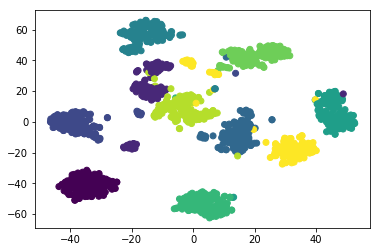

In [210]:
plt.scatter(xt_tsne[:,0], xt_tsne[:,1], c=y_train) #very nice separation

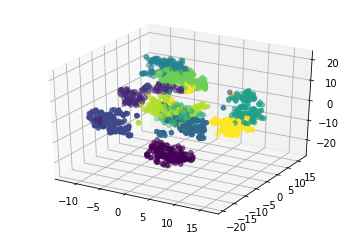

In [211]:
#3D case
tsne = TSNE(n_components=3)
xt_tsne = tsne.fit_transform(X_train)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=xt_tsne[:,0], ys=xt_tsne[:,1], zs=xt_tsne[:,2], c=y_train)

# Hyper Parameter Searching for Classifications

## SVM

In [242]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [244]:
10. ** np.arange(-3,3)

array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02])

In [247]:
param_grid = {'C':10. ** np.arange(-3,3), 'gamma': 10.0 ** np.arange(-5,0)}
print param_grid

{'C': array([  1.00000000e-03,   1.00000000e-02,   1.00000000e-01,
         1.00000000e+00,   1.00000000e+01,   1.00000000e+02]), 'gamma': array([  1.00000000e-05,   1.00000000e-04,   1.00000000e-03,
         1.00000000e-02,   1.00000000e-01])}


In [248]:
svc = SVC()

In [249]:
grid_search = GridSearchCV(svc, param_grid, verbose=3, cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ....... C=0.001, gamma=1e-05, score=0.105442176871, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ....... C=0.001, gamma=1e-05, score=0.103806228374, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] ....... C=0.001, gamma=1e-05, score=0.104895104895, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ....... C=0.001, gamma=1e-05, score=0.105633802817, total=   0.2s
[CV] C=0.001, gamma=1e-05 ............................................
[CV] ....... C=0.001, gamma=1e-05, score=0.105633802817, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ...... C=0.001, gamma=0.0001, score=0.105442176871, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ...... C=0.001, gamma=0.0001, score=0.103806228374, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ...... C=0.001, gamma=0.0001, score=0.104895104895, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] ...... C=0.001, gamma=0.0001, score=0.105633802817, total=   0.2s
[CV] C=0.001, gamma=0.0001 ...........................................
[CV] .

[CV] ......... C=0.1, gamma=0.001, score=0.944636678201, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ......... C=0.1, gamma=0.001, score=0.937062937063, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ......... C=0.1, gamma=0.001, score=0.982394366197, total=   0.1s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ......... C=0.1, gamma=0.001, score=0.968309859155, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .......... C=0.1, gamma=0.01, score=0.105442176871, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .......... C=0.1, gamma=0.01, score=0.103806228374, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .......... C=0.1, gamma=0.01, score=0.104895104895, total=   0.2s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ......... C=10.0, gamma=0.01, score=0.778169014085, total=   0.2s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .......... C=10.0, gamma=0.1, score=0.105442176871, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .......... C=10.0, gamma=0.1, score=0.103806228374, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .......... C=10.0, gamma=0.1, score=0.104895104895, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .......... C=10.0, gamma=0.1, score=0.105633802817, total=   0.3s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .......... C=10.0, gamma=0.1, score=0.105633802817, total=   0.2s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] ....... C=100.0, gamma=1e-05, score=0.979591836735, total=   0.0s
[CV] C=100.0, gamma=1e-05 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   36.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'gamma': array([  1.00000e-05,   1.00000e-04,   1.00000e-03,   1.00000e-02,
         1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [250]:
grid_search.best_params_

{'C': 1.0, 'gamma': 0.001}

In [251]:
grid_search.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [256]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.172124,0.023716,0.10508,0.10508,0.001,1e-05,"{u'C': 0.001, u'gamma': 1e-05}",15,0.105442,0.104987,...,0.104895,0.105126,0.105634,0.104944,0.105634,0.104944,0.003206,0.002415,0.000694,0.000174
1,0.175593,0.023013,0.10508,0.10508,0.001,0.0001,"{u'C': 0.001, u'gamma': 0.0001}",15,0.105442,0.104987,...,0.104895,0.105126,0.105634,0.104944,0.105634,0.104944,0.004643,0.001551,0.000694,0.000174
2,0.168874,0.023667,0.10508,0.10508,0.001,0.001,"{u'C': 0.001, u'gamma': 0.001}",15,0.105442,0.104987,...,0.104895,0.105126,0.105634,0.104944,0.105634,0.104944,0.002190,0.001403,0.000694,0.000174
3,0.172096,0.023133,0.10508,0.10508,0.001,0.01,"{u'C': 0.001, u'gamma': 0.01}",15,0.105442,0.104987,...,0.104895,0.105126,0.105634,0.104944,0.105634,0.104944,0.004414,0.001600,0.000694,0.000174
4,0.181903,0.022923,0.10508,0.10508,0.001,0.1,"{u'C': 0.001, u'gamma': 0.1}",15,0.105442,0.104987,...,0.104895,0.105126,0.105634,0.104944,0.105634,0.104944,0.002791,0.001026,0.000694,0.000174


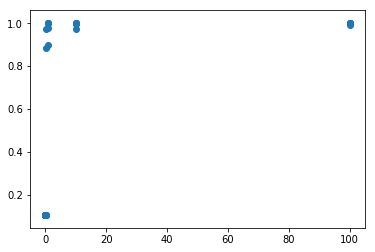

In [265]:
plt.scatter(results.param_C, results.mean_test_score)

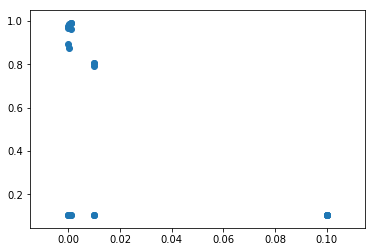

In [267]:
plt.scatter(results.param_gamma, results.mean_test_score)

0     0.105080
1     0.105080
2     0.105080
3     0.105080
4     0.105080
5     0.105080
6     0.105080
7     0.105080
8     0.105080
9     0.105080
10    0.105080
11    0.882916
12    0.972165
13    0.105080
14    0.105080
15    0.899619
16    0.977216
17    0.998956
18    1.000000
19    1.000000
20    0.974955
21    0.997044
22    1.000000
23    1.000000
24    1.000000
25    0.993390
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: mean_train_score, dtype: float64

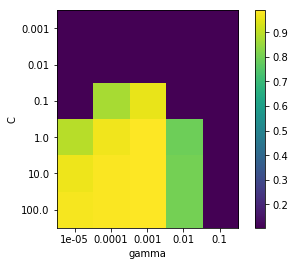

In [270]:
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 5)
plt.imshow(scores) #same as matshow
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), param_grid['gamma'])
plt.yticks(np.arange(6), param_grid['C']);

## RandomForest

In [271]:
rf = RandomForestClassifier()

In [289]:
grid_search = GridSearchCV(rf, param_grid={'n_estimators':[5,10,50,100,150,250,500,750,1000]}, verbose=3, cv=5)

In [290]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_estimators=5 ..................................................
[CV] ............. n_estimators=5, score=0.908163265306, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ............. n_estimators=5, score=0.882352941176, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ............. n_estimators=5, score=0.888111888112, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] .............. n_estimators=5, score=0.94014084507, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ............. n_estimators=5, score=0.890845070423, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ............ n_estimators=10, score=0.942176870748, total=   0.0s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ n_estimators=10, score=0.948096885813, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ............ n_estimators=10, score=0.909090909091, total=   0.1s
[CV] n_estimators=10 .................................................
[CV] ............ n_estimators=10, score=0.957746478873, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ............ n_estimators=10, score=0.950704225352, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] ............ n_estimators=50, score=0.972789115646, total=   0.2s
[CV] n_estimators=50 .................................................
[CV] ............ n_estimators=50, score=0.955017301038, total=   0.2s
[CV] n_estimators=50 .................................................
[CV] ............ n_estimators=50, score=0.954545454545, total=   0.2s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 50, 100, 150, 250, 500, 750, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [291]:
grid_search.best_params_ #500 probably over fitting

{'n_estimators': 500}

In [292]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.020446,0.001027,0.901879,0.993208,5,{u'n_estimators': 5},9,0.908163,0.993001,0.882353,...,0.888112,0.99305,0.940141,0.995663,0.890845,0.998265,0.000773,0.000201,0.020878,0.004068
1,0.044277,0.001537,0.941545,0.999652,10,{u'n_estimators': 10},8,0.942177,1.000000,0.948097,...,0.909091,1.00000,0.957746,1.000000,0.950704,1.000000,0.004190,0.000175,0.016935,0.000697
2,0.197854,0.006095,0.964509,1.000000,50,{u'n_estimators': 50},7,0.972789,1.000000,0.955017,...,0.954545,1.00000,0.985915,1.000000,0.954225,1.000000,0.003622,0.000637,0.012782,0.000000
3,0.404023,0.010964,0.971468,1.000000,100,{u'n_estimators': 100},6,0.976190,1.000000,0.965398,...,0.961538,1.00000,0.985915,1.000000,0.968310,1.000000,0.012025,0.001392,0.008650,0.000000
4,0.601729,0.015504,0.973556,1.000000,150,{u'n_estimators': 150},4,0.976190,1.000000,0.968858,...,0.965035,1.00000,0.989437,1.000000,0.968310,1.000000,0.004536,0.001982,0.008694,0.000000


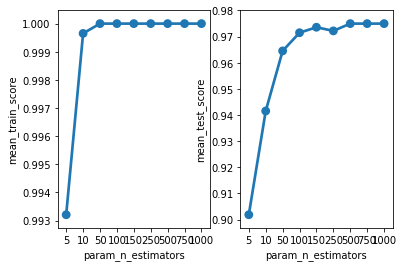

In [293]:
# sns.jointplot(x="param_n_estimators", y="mean_train_score", data=results)
g, a = plt.subplots(ncols=2)
sns.pointplot(results.param_n_estimators, results.mean_train_score, ax=a[0])
sns.pointplot(results.param_n_estimators, results.mean_test_score, ax=a[1])

## Randomized Parameter Optimization

In [596]:
from sklearn.grid_search import RandomizedSearchCV

/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [601]:
param_grid = {'alpha':np.logspace(0,3,10)}

In [602]:
param_grid

{'alpha': array([    1.        ,     2.15443469,     4.64158883,    10.        ,
           21.5443469 ,    46.41588834,   100.        ,   215.443469  ,
          464.15888336,  1000.        ])}

In [603]:
rsearch = RandomizedSearchCV(estimator=Ridge(), param_distributions=param_grid, cv=5, n_iter=10)

In [606]:
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'alpha': array([    1.     ,     2.15443,     4.64159,    10.     ,    21.54435,
          46.41589,   100.     ,   215.44347,   464.15888,  1000.     ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose=0)

In [608]:
rsearch.best_estimator_ #alpha 

Ridge(alpha=21.544346900318832, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

Different from grid search: in randomized search, not all parameters are tried out.

# Regressions

## Exploratory Analysis

In [294]:
from sklearn.datasets import load_boston
boston = load_boston()

In [299]:
print boston.feature_names
print boston.data.shape

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


In [302]:
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names

In [303]:
boston_pd.head() #use this to create additional features later
#let's make a pandas frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [305]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,u'Housing Price')

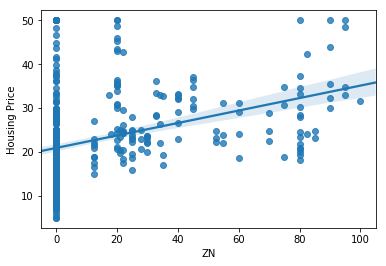

In [324]:
ax = plt.axes()
sns.regplot(boston_pd['ZN'], boston.target, ax=ax)
ax.set_ylabel("Housing Price")

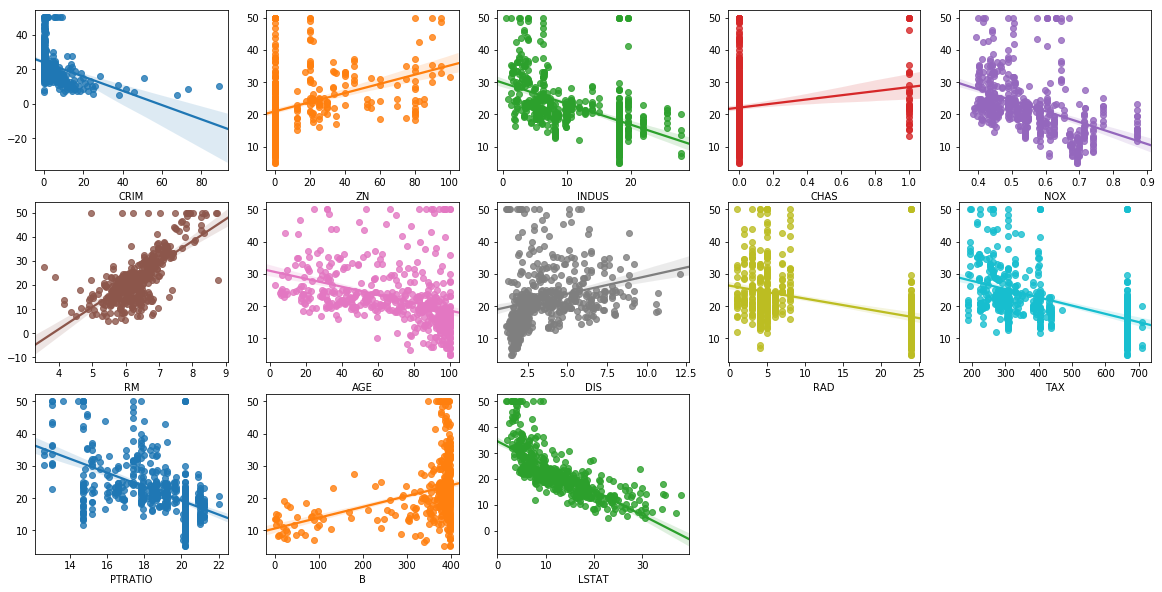

In [323]:
#a good function to quickly investigate correlations
f, a = plt.subplots(3,5,figsize=(20,10))
for i, ax in enumerate(a.ravel()): #ravel - flatten the 2D array into 1D array
    if i >= len(boston_pd.columns):
        ax.set_visible(False)
        continue
    sns.regplot(boston_pd[boston_pd.columns[i]], boston.target, ax=ax)
    #ax.set_title('v.s. target')
    #ax.set_ylabel('$')

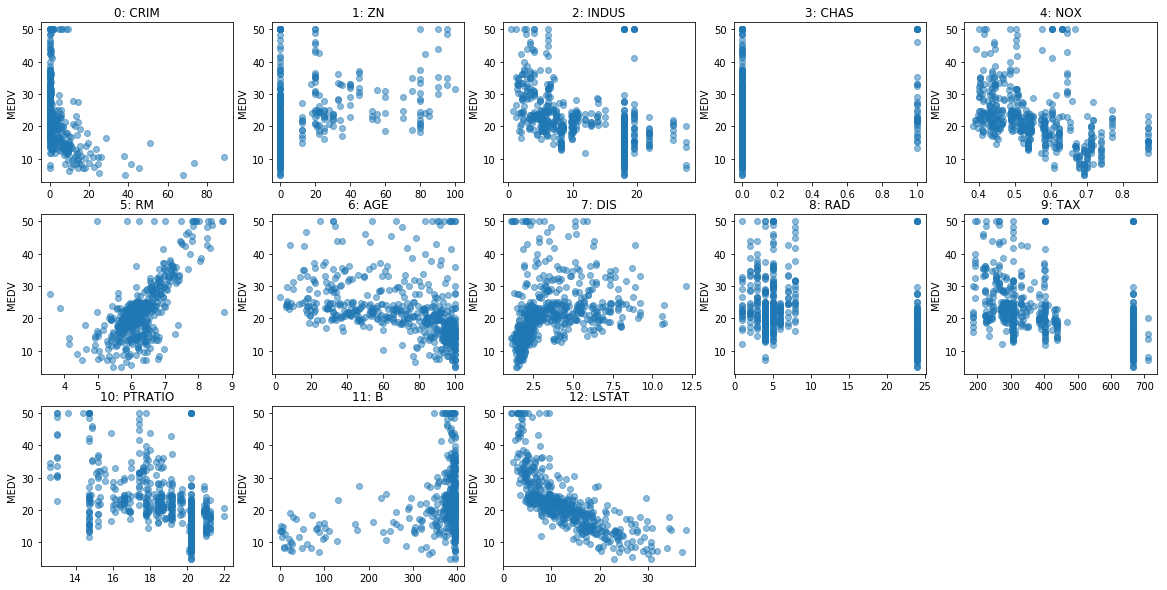

In [327]:
#standard way of plotting
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(boston.data[:, i], boston.target, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

{'boxes': [<matplotlib.lines.Line2D at 0x1c27c33290>,
 'caps': [<matplotlib.lines.Line2D at 0x1c23eb72d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c22ae02d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1c22ae0e10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1c24430c50>,
  <matplotlib.lines.Line2D at 0x1a152bfa10>]}

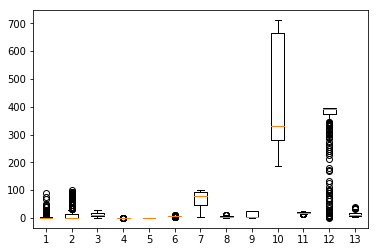

In [330]:
plt.boxplot(boston.data) #this plots for every column

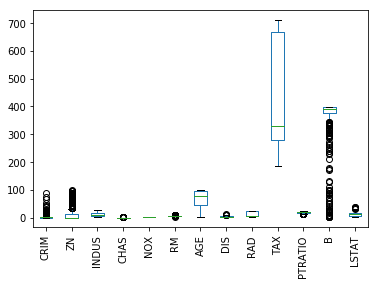

In [336]:
boston_pd.boxplot(rot=90, grid=False) #much easier this way to plot multiple columns

In [333]:
?boston_pd.boxplot

In [341]:
boston_long = boston_pd.melt() #this will 
boston_long.head()

,variable,value
0,CRIM,0.00632
1,CRIM,0.02731
2,CRIM,0.02729
3,CRIM,0.03237
4,CRIM,0.06905


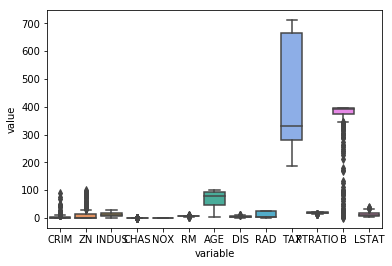

In [343]:
sns.boxplot(data=boston_long, x = 'variable', y = 'value') #another way to make boxplots

In [605]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

In [347]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(379, 13)
(127, 13)
(379,)
(127,)


In [348]:
X_train_scaled = StandardScaler().fit_transform(X_train)

## Regression Model Comparisons
### KNN

In [364]:

from sklearn.neighbors import KNeighborsRegressor

#mse
scores_scaled_knn_mse = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print - scores_scaled_knn_mse.mean()

#r2
scores_scaled_knn_r2 = cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train, cv=5, scoring='r2')
print scores_scaled_knn_r2.mean()

27.6136930667
0.688223977058


### RandomForest

In [363]:
 #Let's try randomforest
from sklearn.ensemble import RandomForestRegressor

#mse 
scores_scaled_mse_rf = cross_val_score(RandomForestRegressor(n_estimators=50), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print - scores_scaled_mse_rf.mean()

#r2 
scores_scaled_r2_rf = cross_val_score(RandomForestRegressor(n_estimators=50), X_train_scaled, y_train, cv=5, scoring='r2')
print scores_scaled_r2_rf.mean()

11.9857516907
0.839942086995


### XGBoost

In [365]:
from xgboost import XGBRegressor

In [370]:
#
score_scaled_mse_xgb = cross_val_score(XGBRegressor(), X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
print -score_scaled_mse_xgb.mean()

score_scaled_r2_xgb = cross_val_score(XGBRegressor(), X_train_scaled, y_train, cv=10, scoring='r2')
print score_scaled_r2_xgb.mean()

10.3840813178
0.869346744122


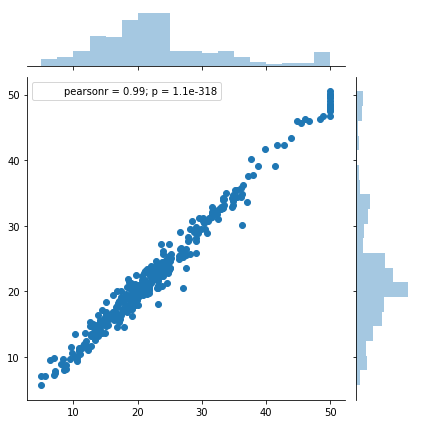

In [371]:
#build a model 
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)
sns.jointplot(y_train, xgb_reg.predict(X_train_scaled)) #super high pearson correlation on training data

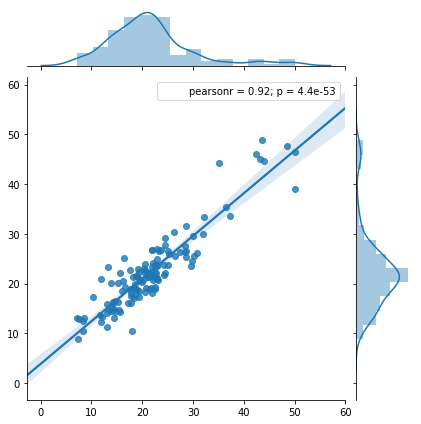

In [373]:
sns.jointplot(y_test, xgb_reg.predict(StandardScaler().fit_transform(X_test)), kind="reg") #scatter on test is higher

In [376]:
print mean_squared_error(y_test, xgb_reg.predict(StandardScaler().fit_transform(X_test))) #This would be error on test data

11.2066941491


### Linear Regression

In [432]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet

In [430]:
#linear model, performance is very poor 
scores_scaled_lm_mse = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print - scores_scaled_lm_mse.mean()

scores_scaled_lm_r2 = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=5, scoring='r2')
print scores_scaled_lm_r2.mean()

26.6825998281
0.68611706496


### Ridge Regression

If there are not a large number of correlated features then not so useful

In [437]:
scores_scaled_rd_mse = cross_val_score(Ridge(alpha=1.0), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print - scores_scaled_rd_mse.mean()

scores_scaled_rd_r2 = cross_val_score(Ridge(alpha=1.0), X_train_scaled, y_train, cv=5, scoring='r2')
print scores_scaled_rd_r2.mean()

26.6401013938
0.686782487024


### Lasso Regression

In [441]:
#alpha = 0 : no regularization
scores_scaled_lr_mse = cross_val_score(Lasso(alpha=0.01), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print - scores_scaled_lr_mse.mean()

scores_scaled_lr_r2 = cross_val_score(Lasso(alpha=0.01), X_train_scaled, y_train, cv=5, scoring='r2')
print scores_scaled_lr_r2.mean()

26.6372381037
0.686940821574


### Elastic Net

In [442]:
scores_scaled_en_mse = cross_val_score(ElasticNet(alpha=0.01, l1_ratio=0.5), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print - scores_scaled_en_mse.mean()

scores_scaled_lr_r2 = cross_val_score(ElasticNet(alpha=0.01, l1_ratio=0.5), X_train_scaled, y_train, cv=5, scoring='r2')
print scores_scaled_lr_r2.mean()

26.601138763
0.687458936024


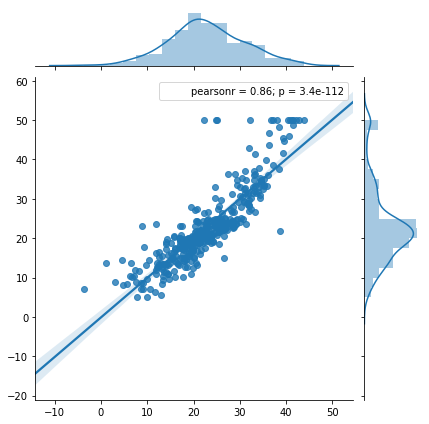

In [447]:
sns.jointplot(
ElasticNet(alpha=0.01, l1_ratio=0.5).fit(X_train_scaled, y_train).predict(X_train_scaled),
y_train, kind="reg") #Predictions for some values are really poor 

### Demonstrate Regularization

In [534]:
#This part shoud be run after the polynomial features, but just to demo

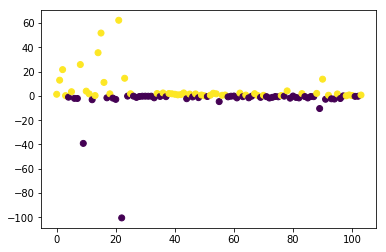

In [533]:
lr = LinearRegression().fit(X_train_scaled_poly, y_train)
plt.scatter(range(X_train_scaled_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_))

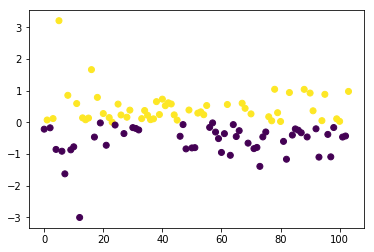

In [543]:
#coefficent shrank, but kept all features
rg = Ridge(alpha=15).fit(X_train_scaled_poly, y_train)
plt.scatter(range(X_train_scaled_poly.shape[1]), rg.coef_, c=np.sign(rg.coef_))

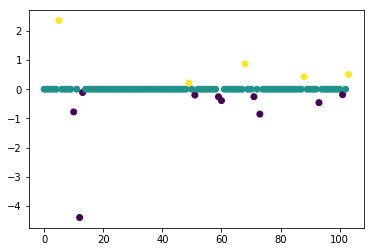

In [542]:
#coefficent shrank to 0 
ls = Lasso(alpha=0.5).fit(X_train_scaled_poly, y_train)
plt.scatter(range(X_train_scaled_poly.shape[1]), ls.coef_, c=np.sign(ls.coef_))

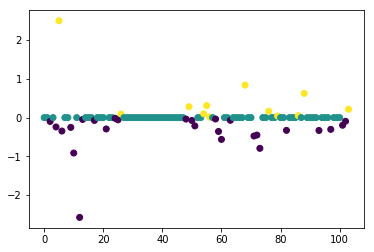

In [546]:
#coefficent shrank to 0; L1.5 regularization; why we want to do this 
en = ElasticNet(alpha=0.5).fit(X_train_scaled_poly, y_train)
plt.scatter(range(X_train_scaled_poly.shape[1]), en.coef_, c=np.sign(en.coef_))

These techiniques are useful for feature selections

## Hyper Parameter Searching

In [450]:
param_grid = {'alpha': np.logspace(-3,3,14)}
print(param_grid) #param grid

{'alpha': array([  1.00000000e-03,   2.89426612e-03,   8.37677640e-03,
         2.42446202e-02,   7.01703829e-02,   2.03091762e-01,
         5.87801607e-01,   1.70125428e+00,   4.92388263e+00,
         1.42510267e+01,   4.12462638e+01,   1.19377664e+02,
         3.45510729e+02,   1.00000000e+03])}


In [464]:
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=5, return_train_score=True, verbose=3, scoring='r2')
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.652193474752, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.743495595247, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.781485923328, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.563627851316, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ................ alpha=0.001, score=0.689786072372, total=   0.0s
[CV] alpha=0.00289426612472 ..........................................
[CV] ...... alpha=0.00289426612472, score=0.65219281258, total=   0.0s
[CV] alpha=0.00289426612472 ..........................................
[CV] ..... alpha

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=41.246263829 ..............................................
[CV] ......... alpha=41.246263829, score=0.679160142993, total=   0.0s
[CV] alpha=119.377664171 .............................................
[CV] ........ alpha=119.377664171, score=0.595379153489, total=   0.0s
[CV] alpha=119.377664171 .............................................
[CV] ........ alpha=119.377664171, score=0.717291624976, total=   0.0s
[CV] alpha=119.377664171 .............................................
[CV] ........ alpha=119.377664171, score=0.755716422659, total=   0.0s
[CV] alpha=119.377664171 .............................................
[CV] ........ alpha=119.377664171, score=0.642205204127, total=   0.0s
[CV] alpha=119.377664171 .............................................
[CV] ......... alpha=119.377664171, score=0.64585491215, total=   0.0s
[CV] alpha=345.510729459 .............................................
[CV] ........ alpha=345.510729459, score=0.509993389732, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=3)

In [465]:
grid.best_params_

{'alpha': 14.251026703029993}

In [491]:
#pretty good
for i in range(5):
    kf = KFold(n_splits=5, shuffle=True)
    print cross_val_score(Ridge(alpha= 14.251026703029993), X_train_scaled, y_train, cv=kf, scoring='r2').mean()

0.700559241061
0.704601471303
0.711048557837
0.710817182303
0.72423765789


In [486]:
print mean_squared_error(grid.best_estimator_.predict(X_train_scaled), y_train)
print r2_score(grid.best_estimator_.predict(X_train_scaled), y_train) #not impressive

23.3245434559
0.62712547854


In [487]:
perf = pd.DataFrame(grid.cv_results_)

[Text(0,0,u'0.001'),
 Text(0,0,u'0.00289426612472'),
 Text(0,0,u'0.00837677640068'),
 Text(0,0,u'0.0242446201708'),
 Text(0,0,u'0.070170382867'),
 Text(0,0,u'0.20309176209'),
 Text(0,0,u'0.587801607227'),
 Text(0,0,u'1.70125427985'),
 Text(0,0,u'4.92388263171'),
 Text(0,0,u'14.251026703'),
 Text(0,0,u'41.246263829'),
 Text(0,0,u'119.377664171'),
 Text(0,0,u'345.510729459'),
 Text(0,0,u'1000.0')]

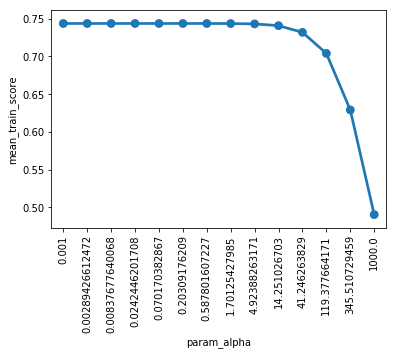

In [475]:
#this is a bit counter intuitive
g = sns.pointplot(data=perf, x='param_alpha', y='mean_train_score')
loc,labels = plt.xticks()
g.set_xticklabels(labels, rotation = 90)

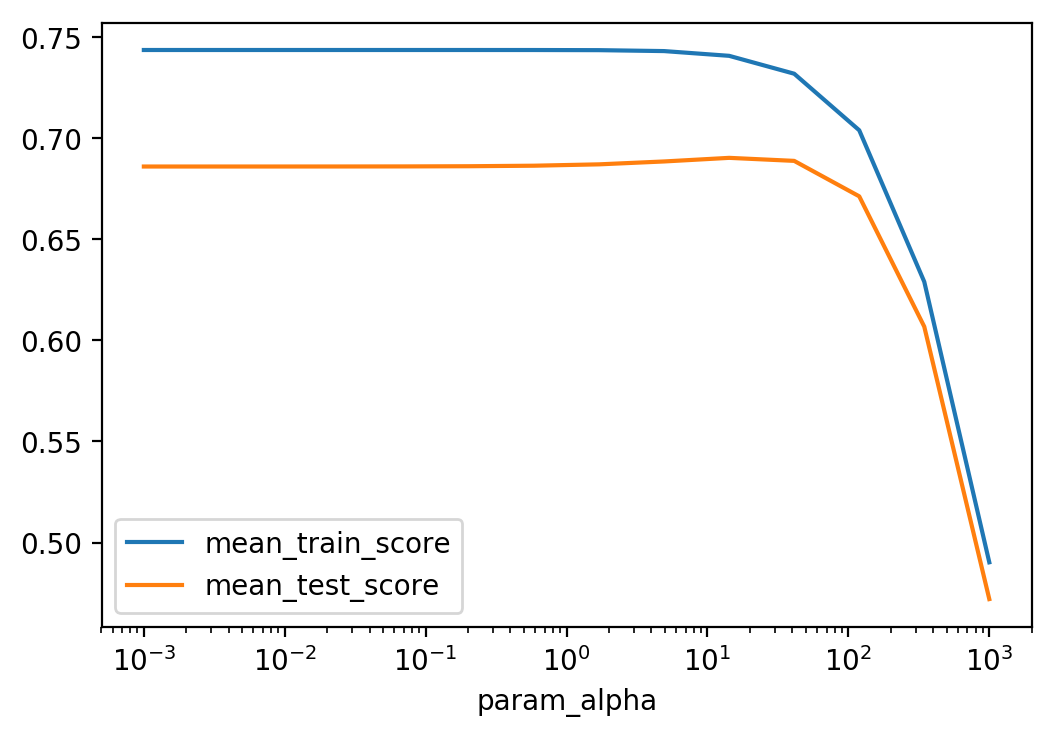

In [493]:
#plot multiple lines
plt.figure(dpi=200)
perf.plot('param_alpha', 'mean_train_score', ax=plt.gca())
perf.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

# Feature Engineering

In [377]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhatten', 'Queens', 'Manhatten', 'Brooklyn', 'Brooklyn', 'Bronx']})
df

,boro,salary
0,Manhatten,103
1,Queens,89
2,Manhatten,142
3,Brooklyn,54
4,Brooklyn,63
5,Bronx,219


## Dummy Variables

In [425]:
pd.get_dummies(df) #one-hot encoding
#pd.get_dummies(df, columns=['boro'])

,salary,boro_Bronx,boro_Brooklyn,boro_Manhatten,boro_Queens
0,103,0,0,1,0
1,89,0,0,0,1
2,142,0,0,1,0
3,54,0,1,0,0
4,63,0,1,0,0
5,219,1,0,0,0


In [384]:
#pd.get_dummies(pd.qcut(df.salary, 2)) #one hot this way
pd.qcut(df.salary, 3)

0     (80.333, 116.0]
1     (80.333, 116.0]
2      (116.0, 219.0]
3    (53.999, 80.333]
4    (53.999, 80.333]
5      (116.0, 219.0]
Name: salary, dtype: category
Categories (3, interval[float64]): [(53.999, 80.333] < (80.333, 116.0] < (116.0, 219.0]]

In [407]:
df2 = pd.get_dummies(df)
df2['salary_bucket'] = pd.qcut(df.salary, 3, labels=False)

In [415]:
print df2.values[0,5] < df2.values[2,5] #check encoding

True


In [409]:
X_train_sub = df2.drop('salary', axis = 1).values

In [410]:
y_train_sub = df2['salary']
X_train_sub

array([[0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 0, 2],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 2]])

In [411]:
rf = RandomForestRegressor()
rf.fit(X_train_sub, y_train_sub) #so interval won't work

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

410.065833333


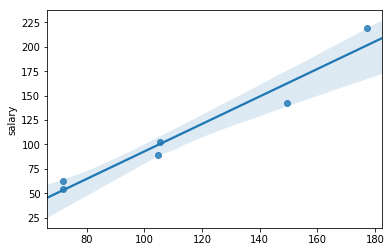

In [418]:
sns.regplot(rf.predict(X_train_sub), y_train_sub) #GOOD. The QCUT will return bucketed values according to distribution
#if the test data's distribution is comparable with the training data then it's fine
print mean_squared_error(rf.predict(X_train_sub), y_train_sub) #trend is linear, prediction is off

#qcut

In [424]:
#range functions to generate series
#np.arange(0,1,0.1)
#range(0,10)

## Polynomial Features

In [496]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale

In [506]:
X_train_scaled_poly = PolynomialFeatures(include_bias=False).fit_transform(X_train_scaled)
#X_test_scaled_poly = PolynomialFeatures(include_bias=False).fit_transform(X_test_scaled)

In [501]:
print X_train_scaled_poly.shape #

(379, 104)


In [511]:
#Try and compare w/ polynomial features
kf = KFold(n_splits=5, shuffle=True)

scores_scaled_lm_mse = cross_val_score(LinearRegression(), X_train_scaled_poly, y_train, cv=kf, scoring='neg_mean_squared_error')
print - scores_scaled_lm_mse.mean()


scores_scaled_lm_r2 = cross_val_score(LinearRegression(), X_train_scaled_poly, y_train, cv=kf, scoring='r2')
print scores_scaled_lm_r2.mean() #prety good, imporoved to 0.8 w/ cross validation

17.9011440495
0.825988865372


In [504]:
#boost from 0.68 - 0.79, at the potential cost of overfitting

In [515]:
#Try and compare w/ polynomial features
#MSE much lower
kf = KFold(n_splits=5, shuffle=True)

scores_scaled_lm_mse = cross_val_score(XGBRegressor(), X_train_scaled_poly, y_train, cv=kf, scoring='neg_mean_squared_error')
print - scores_scaled_lm_mse.mean()


scores_scaled_lm_r2 = cross_val_score(XGBRegressor(), X_train_scaled_poly, y_train, cv=kf, scoring='r2')
print scores_scaled_lm_r2.mean() #prety good, imporoved to 0.8 w/ cross validation

14.1457648631
0.849892679225


### Parameter search to fit the best

In [516]:
param_grid = {'alpha': np.logspace(-3,3,14)}
grid = GridSearchCV(Ridge(), param_grid=param_grid, cv=10, return_train_score=True)

In [517]:
grid.fit(X_train_scaled_poly, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   2.89427e-03,   8.37678e-03,   2.42446e-02,
         7.01704e-02,   2.03092e-01,   5.87802e-01,   1.70125e+00,
         4.92388e+00,   1.42510e+01,   4.12463e+01,   1.19378e+02,
         3.45511e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [520]:
results = pd.DataFrame(grid.cv_results_) #This would be accuracy by default

In [519]:
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003532,0.000325,0.807587,0.937251,0.001,{u'alpha': 0.001},11,0.762794,0.949365,0.914088,...,0.809481,0.938321,0.924193,0.931677,0.835780,0.936931,0.007030,0.000130,0.123588,0.004911
1,0.001073,0.000253,0.808562,0.937149,0.00289427,{u'alpha': 0.00289426612472},10,0.764067,0.949335,0.913953,...,0.808812,0.938241,0.924335,0.931619,0.842710,0.936630,0.000168,0.000027,0.123633,0.004929
2,0.001092,0.000286,0.810172,0.937069,0.00837678,{u'alpha': 0.00837677640068},9,0.765288,0.949286,0.914083,...,0.808499,0.938185,0.924800,0.931557,0.850215,0.936395,0.000158,0.000038,0.122890,0.004936
3,0.001188,0.000321,0.813002,0.936965,0.0242446,{u'alpha': 0.0242446201708},8,0.766510,0.949209,0.914450,...,0.808666,0.938120,0.925722,0.931454,0.860637,0.936101,0.000316,0.000162,0.121407,0.004942
4,0.001106,0.000258,0.817440,0.936701,0.0701704,{u'alpha': 0.070170382867},7,0.768389,0.949001,0.915065,...,0.809995,0.937941,0.927144,0.931173,0.873376,0.935487,0.000250,0.000034,0.119306,0.004959


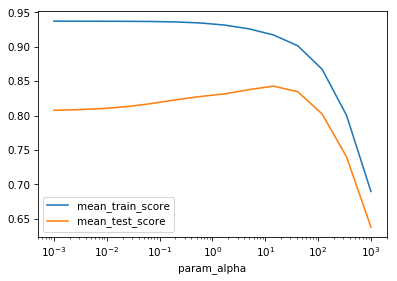

In [525]:
plt.figure(dpi=75)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [527]:
print grid.best_params_
print grid.best_score_

{'alpha': 14.251026703029993}
0.84277660425


## Binary / Ordinal Variables

In [549]:
from sklearn.preprocessing import LabelEncoder
#the label binarizier is used to generate 1 v.s. all type of labels

In [554]:
lb_encoder = LabelEncoder()
lb_encoder.fit(['a','b','c','d'])
print lb_encoder.classes_
print lb_encoder.transform(['a','b','c','d']) #keep ordinal values

['a' 'b' 'c' 'd']
[0 1 2 3]


In [555]:
from sklearn.preprocessing import Binarizer

In [561]:
#why the heck this doesn't work on a one-dimensional array?
Binarizer(threshold=0.5).fit_transform(np.random.random(10).reshape(-1,1))

array([[ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.]])

In [569]:
#print np.transpose(np.random.random(10), axes=0)
#print(np.random.random(10).reshape(-1,5)).transpose() #
#transposed doesn't work for 1D array, and Binarizer always expect 2D array.. why? seems silly

# Imputation

In [570]:
from sklearn.preprocessing import Imputer

In [572]:
#commonly used strategies: mean, median, mode (most frequent)
#this only support simple imputation like mean, median, mode fills

In [577]:
#axis = 0: columns. # axis = 1, rows
#X_train_scaled[0,:]